In [1]:
# Python >= 3.5 is required 
import sys
assert sys.version_info >= (3,5)

# Scikit-Learn >= 0.20 is required 
import sklearn
assert sklearn.__version__ >= "0.20"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

In [2]:
# get the data
import pandas as pd
train_set = pd.read_csv('data/Train.csv', delimiter=',')
valid_set = pd.read_csv('data/Valid.csv', delimiter=',')
y_valid = pd.read_csv('data/ValidSolution.csv', delimiter=',')

/home/kelwa/anaconda3/envs/fastai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_set.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121           3.0      2004   
1  1139248      57000     117657       77         121           3.0      1996   
2  1139249      10000     434808     7009         121           3.0      2001   
3  1139251      38500    1026470      332         121           3.0      2001   
4  1139253      11000    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand         saledate  ...  \
0                      68.0       Low  11/16/2006 0:00  ...   
1                    4640.0       Low   3/26/2004 0:00  ...   
2                    2838.0      High   2/26/2004 0:00  ...   
3                    3486.0      High   5/19/2011 0:00  ...   
4                     722.0    Medium   7/23/2009 0:00  ...   

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer Grouser_Type  \
0                     NaN          NaN   NaN             NaN          NaN   
1                     NaN          NaN   NaN             NaN          NaN   
2                     NaN          NaN   NaN             NaN          NaN   
3                     NaN          NaN   NaN             NaN          NaN   
4                     NaN          NaN   NaN             NaN          NaN   

  Backhoe_Mounting Blade_Type Travel_Controls Differential_Type  \
0              NaN        NaN             NaN          Standard   
1              NaN        NaN             NaN          Standard   
2              NaN        NaN             NaN               NaN   
3              NaN        NaN             NaN               NaN   
4              NaN        NaN             NaN               NaN   

  Steering_Controls  
0      Conventional  
1      Conventional  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 53 columns]

In [4]:
# nan values percentages per columns
nan_features_pct = {}
for feature, nans in zip(train_set.columns, train_set.isna().sum()):
    pct = nans / train_set.shape[0]
    if pct > 0:
        nan_features_pct[feature] = pct
nan_features_pct

{'auctioneerID': 0.050198815830476785,
 'MachineHoursCurrentMeter': 0.6440885010906825,
 'UsageBand': 0.8263907759426613,
 'fiSecondaryDesc': 0.34201558117793707,
 'fiModelSeries': 0.8581290121533188,
 'fiModelDescriptor': 0.8207067622312246,
 'ProductSize': 0.5254596447491431,
 'Drive_System': 0.73982923028981,
 'Enclosure': 0.0008102212527267062,
 'Forks': 0.5211542536615769,
 'Pad_Type': 0.8027198504206918,
 'Ride_Control': 0.6295269554378311,
 'Stick': 0.8027198504206918,
 'Transmission': 0.5432097226550328,
 'Turbocharged': 0.8027198504206918,
 'Blade_Extension': 0.9371293237768775,
 'Blade_Width': 0.9371293237768775,
 'Enclosure_Type': 0.9371293237768775,
 'Engine_Horsepower': 0.9371293237768775,
 'Hydraulics': 0.20082268619507634,
 'Pushblock': 0.9371293237768775,
 'Ripper': 0.7403876597070739,
 'Scarifier': 0.9371019009037084,
 'Tip_Control': 0.9371293237768775,
 'Tire_Size': 0.7638691181053288,
 'Coupler': 0.4666201308818947,
 'Coupler_System': 0.8916597070738548,
 'Grouser_Tr

In [5]:
train_set.dtypes

SalesID                       int64
SalePrice                     int64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [6]:
object_features = [feature for feature, dtype in zip(train_set.columns, train_set.dtypes) if dtype=='object']
object_features

['UsageBand',
 'saledate',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

class ObjectAndCategoricalAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_objects=False, add_nans=False, date=True):
        self.add_objects = add_objects
        self.add_nans = add_nans
        self.date = date
        self.object_features = []
        self.nan_features = {}
        
    def fit(self, X, y=None):
        if not self.add_objects:
            self.object_features = [feature for feature, dtype in zip(X.columns, X.dtypes) if dtype=='object' and feature != 'saledate']
        
        if not self.add_nans:
            for feature, nans in zip(X.columns, X.isna().sum()):
                self.nan_features[feature] = nans/X[feature].shape[0]

        return self
    
    def transform(self, X):
        new_data = X.copy()
        if not self.add_objects:
            new_data.drop(self.object_features, axis=1, inplace=True)
        
        if not self.add_nans:
            for feature, nans in self.nan_features.items():
                if nans > 0:
                    try:
                        new_data.drop(feature, axis=1, inplace=True)
                    except KeyError:
                        continue
        
        return new_data

In [8]:
# Testing Transformer
cat_ob_transformer = ObjectAndCategoricalAttributes()
cat_ob_transformer.fit(train_set)
train_temp = cat_ob_transformer.transform(train_set)
train_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  YearMade  \
0  1139246      66000     999089     3157         121      2004   
1  1139248      57000     117657       77         121      1996   
2  1139249      10000     434808     7009         121      2001   
3  1139251      38500    1026470      332         121      2001   
4  1139253      11000    1057373    17311         121      2007   

          saledate  
0  11/16/2006 0:00  
1   3/26/2004 0:00  
2   2/26/2004 0:00  
3   5/19/2011 0:00  
4   7/23/2009 0:00

In [9]:
class DatesHandler(BaseEstimator, TransformerMixin):
    def __init__(self, year=True, month=False, day=False):
        self.year = year,
        self.month = month
        self.day = day
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_new = X.copy()
        if self.year:
            X_new['year'] = [date.year for date in pd.to_datetime(X_new.saledate)]
        if self.month:
            X_new['month'] = [date.month for date in pd.to_datetime(X_new.saledate)]
        if self.day:
            X_new['day'] = [date.day for date in pd.to_datetime(X_new.saledate)]
            
        return X_new.drop('saledate', axis=1)

In [10]:
datesHandler = DatesHandler(1, 1, 1)
train_temp = datesHandler.transform(train_temp)
train_temp.head()

SalesID  SalePrice  MachineID  ModelID  datasource  YearMade  year  month  \
0  1139246      66000     999089     3157         121      2004  2006     11   
1  1139248      57000     117657       77         121      1996  2004      3   
2  1139249      10000     434808     7009         121      2001  2004      2   
3  1139251      38500    1026470      332         121      2001  2011      5   
4  1139253      11000    1057373    17311         121      2007  2009      7   

   day  
0   16  
1   26  
2   26  
3   19  
4   23

In [11]:
from sklearn.pipeline import Pipeline

base_pipeline = Pipeline([
    ('Objects_Nans', ObjectAndCategoricalAttributes()),
    ('DatesHandler', DatesHandler())
])

In [12]:
# loss function
from sklearn.metrics import mean_squared_log_error, make_scorer
import numpy as np
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred))

In [13]:
# Transform the data
base_pipeline.fit(train_set)
X = base_pipeline.transform(train_set)

y = X.SalePrice
X.drop('SalePrice', axis=1, inplace=True)

In [14]:
X.head()

SalesID  MachineID  ModelID  datasource  YearMade  year
0  1139246     999089     3157         121      2004  2006
1  1139248     117657       77         121      1996  2004
2  1139249     434808     7009         121      2001  2004
3  1139251    1026470      332         121      2001  2011
4  1139253    1057373    17311         121      2007  2009

In [15]:
y.head()

0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int64

In [16]:
# No nans and spread the date
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

reg_rfg = RandomForestRegressor(random_state=42)
param_grid = {'bootstrap': [False, True], 'n_estimators': [3, 10], 'max_features': ['auto', 'sqrt']}

base_model = GridSearchCV(reg_rfg, param_grid, make_scorer(rmsle), cv=5, n_jobs=-1, verbose=1)

base_model.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False, True],
       

In [17]:
base_model.best_score_

0.7334379087118055

In [18]:
# Expand the dates
base_pipeline = Pipeline([
    ('Objects_Nans', ObjectAndCategoricalAttributes()),
    ('DatesHandler', DatesHandler(1, 1, 1))
])

In [19]:
# Transform the data
base_pipeline.fit(train_set)
X = base_pipeline.transform(train_set)

y = X.SalePrice
X.drop('SalePrice', axis=1, inplace=True)

In [20]:
X.head()

SalesID  MachineID  ModelID  datasource  YearMade  year  month  day
0  1139246     999089     3157         121      2004  2006     11   16
1  1139248     117657       77         121      1996  2004      3   26
2  1139249     434808     7009         121      2001  2004      2   26
3  1139251    1026470      332         121      2001  2011      5   19
4  1139253    1057373    17311         121      2007  2009      7   23

In [21]:
base_model = GridSearchCV(reg_rfg, param_grid, make_scorer(rmsle), cv=5, n_jobs=-1, verbose=1)

base_model.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [False, True],
       

In [22]:
base_model.best_score_

0.7159641561854518

In [23]:
# Try on the validation set
X_valid = base_pipeline.transform(valid_set)
X_valid.head()

SalesID  MachineID  ModelID  datasource  YearMade  year  month  day
0  1222837     902859     1376         121      1000  2012      1    5
1  1222839    1048320    36526         121      2006  2012      1    5
2  1222841     999308     4587         121      2000  2012      1    5
3  1222843    1062425     1954         121      1000  2012      1    5
4  1222845    1032841     4701         121      2002  2012      1    4

In [24]:
y_valid.drop(['SalesID', 'Usage'], axis=1, inplace=True)
y_valid.head()

SalePrice
0    31000.0
1    54000.0
2    26500.0
3    10000.0
4    35000.0

In [25]:
y_valid_pred = base_model.predict(X_valid)
rmsle(y_valid_pred, y_valid)

0.5599999912091574

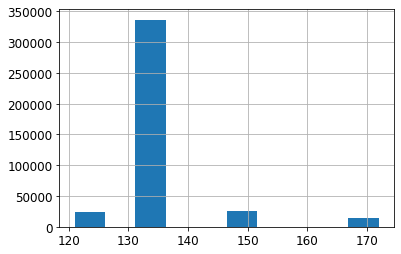

In [26]:
train_set['datasource'].hist()

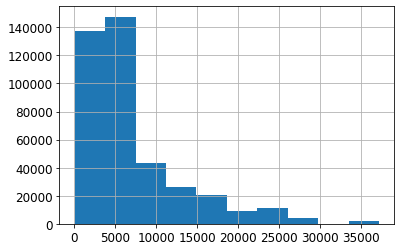

In [27]:
train_set['ModelID'].hist()

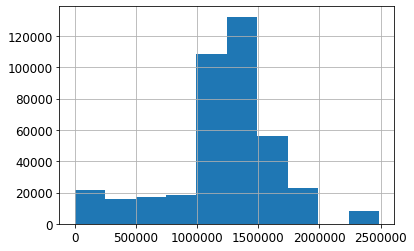

In [28]:
train_set['MachineID'].hist()

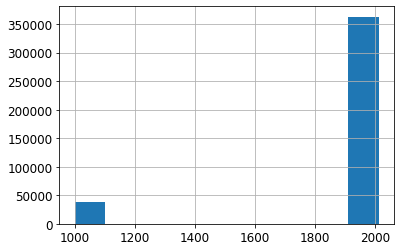

In [29]:
train_set['YearMade'].hist()

[]

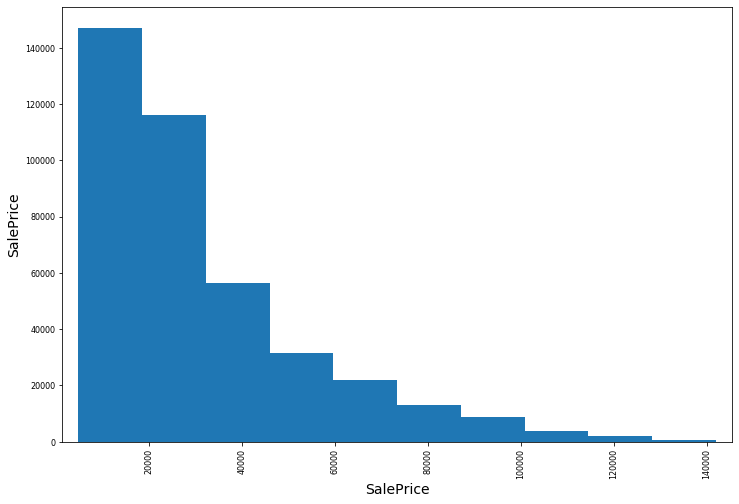

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'saledate']

scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.plot()

[]

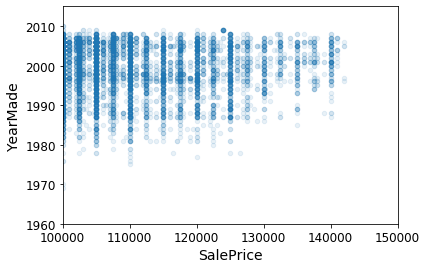

In [31]:
train_set.plot(kind='scatter', x='SalePrice', y='YearMade', alpha=0.1)
plt.axis([100000, 150000, 1960, 2015])
plt.plot()

[]

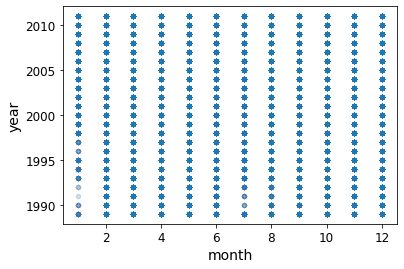

In [32]:
X.plot(kind='scatter', x='month', y='year', alpha=0.01)
#plt.axis([1960, 2015, 1960, 2015])
plt.plot()

[]

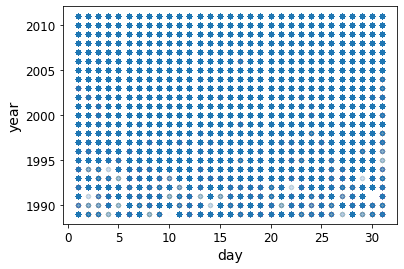

In [33]:
X.plot(kind='scatter', x='day', y='year', alpha=0.01)
#plt.axis([1960, 2015, 1960, 2015])
plt.plot()

In [34]:
# Expand the dates -> only using the years
base_pipeline = Pipeline([
    ('Objects_Nans', ObjectAndCategoricalAttributes()),
    ('DatesHandler', DatesHandler())
])

base_pipeline.fit(train_set)
X = base_pipeline.transform(train_set)
y = X.SalePrice
X.drop('SalePrice', axis=1, inplace=True)

In [35]:
base_model = GridSearchCV(reg_rfg, param_grid, make_scorer(rmsle), cv=5, n_jobs=-1, verbose=1)

base_model.fit(X, y)
base_model.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished


0.7334379087118055

In [36]:
X_valid = base_pipeline.transform(valid_set)
y_valid_pred = base_model.predict(X_valid)
rmsle(y_valid_pred, y_valid)

0.46438002332719414

In [38]:
# Save the model
from joblib import dump, load
dump(base_model, 'models/base_model.joblib')

['models/base_model.joblib']

In [40]:
base_model = load('models/base_model.joblib')
base_model.predict(X_valid)

array([32666.66666667, 58333.33333333, 25300.        , ...,
        8500.        , 37833.33333333, 19166.66666667])

# Make a submission


In [41]:
test_df = pd.read_csv('data/Test.csv')
test_df.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter UsageBand        saledate fiModelDesc  ...  \
0                    3688.0       Low   5/3/2012 0:00        580G  ...   
1                   28555.0      High  5/10/2012 0:00         936  ...   
2                    6038.0    Medium  5/10/2012 0:00    EC210BLC  ...   
3                    8940.0      High  5/10/2012 0:00       330CL  ...   
4                    2286.0       Low  5/10/2012 0:00        650K  ...   

  Undercarriage_Pad_Width         Stick_Length   Thumb      Pattern_Changer  \
0                     NaN                  NaN     NaN                  NaN   
1                     NaN                  NaN     NaN                  NaN   
2     None or Unspecified                9' 6"  Manual  None or Unspecified   
3     None or Unspecified  None or Unspecified  Manual                  Yes   
4                     NaN                  NaN     NaN                  NaN   

  Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
0          NaN                  NaN        NaN                  NaN   
1          NaN                  NaN        NaN                  NaN   
2       Double                  NaN        NaN                  NaN   
3       Triple                  NaN        NaN                  NaN   
4          NaN  None or Unspecified        PAT  None or Unspecified   

  Differential_Type Steering_Controls  
0               NaN               NaN  
1          Standard      Conventional  
2               NaN               NaN  
3               NaN               NaN  
4               NaN               NaN  

[5 rows x 52 columns]

In [42]:
X_test = base_pipeline.transform(test_df)
X_test.head()

SalesID  MachineID  ModelID  datasource  YearMade  year
0  1227829    1006309     3168         121      1999  2012
1  1227844    1022817     7271         121      1000  2012
2  1227847    1031560    22805         121      2004  2012
3  1227848      56204     1269         121      2006  2012
4  1227863    1053887    22312         121      2005  2012

In [43]:
test_preds = base_model.predict(X_test)
test_preds[:10]

array([19333.33333333, 23250.        , 45416.66666667, 78166.66666667,
       25166.66666667, 51833.33333333, 48500.        , 10166.66666667,
       20000.        , 29000.        ])

In [44]:
submission = pd.DataFrame({'SalesID': test_df.SalesID, 'SalePrice': test_preds})
submission.head()

SalesID     SalePrice
0  1227829  19333.333333
1  1227844  23250.000000
2  1227847  45416.666667
3  1227848  78166.666667
4  1227863  25166.666667

In [45]:
submission.to_csv('submission.csv', index=False)